<a href="https://colab.research.google.com/github/whatiddone/MLDL_Study/blob/main/1st_week(Ch.3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-1.k-최근접 이웃 회귀

## 농어 데이터 준비

In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

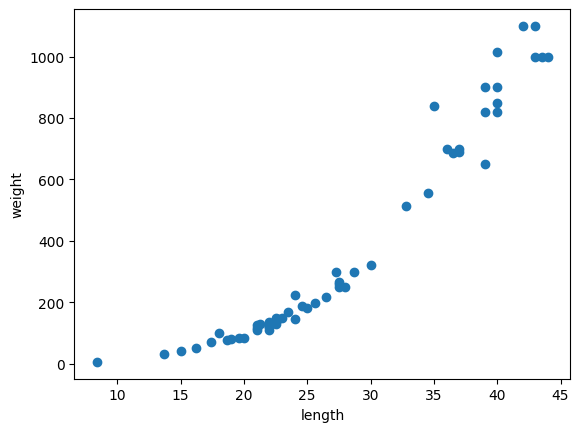

In [3]:
# 산점도로 데이터 확인
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 머신러닝 준비

### 훈련 세트와 테스트 세트로 분류

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [5]:
#사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다.

print(train_input.shape, test_input.shape)

(42,) (14,)


test 데이터셋이 기본값인 14개(1/3)으로 설정되어 있다.

### 2차원 배열로 변경

In [6]:
# 현재 'train_input'과 'test_input'은 1차원 배열 형태이다. "reshape()" 메서드를 활용하여 원소의 배열을 변경해야 한다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)


-1을 사용한 자동 계산법: 새로운 형태에서 하나의 차원에 -1을 지정하면, 해당 차원은 다른 차원의 값에 따라 자동으로 계산된다. <br>
이 경우 train은 (42,1), test는 (14,1)로 자동 계산된다.

In [7]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## k-최근접 이웃 회귀 알고리즘(KNeighborsRegressor)

In [8]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [9]:
# 테스트 세트의 R^2 점수
print(knr.score(test_input, test_target))

0.992809406101064


In [10]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만들기
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)

print("테스트 세트에 대한 평균 절댓값 오차:", mae)

테스트 세트에 대한 평균 절댓값 오차: 19.157142857142862


결과에서 예측이 평균적으로 타깃값보다 19g 정도 다르다는 것을 확인

### 훈련세트를 사용해 평가해보기

In [11]:
# 훈련 세트의 R^2 점수
print(knr.score(train_input, train_target))

0.9698823289099254


- train 데이터를 활용해 모델을 만들었으므로, 모델은 test보다 train에서 점수가 더 높은것이 일반적.

- train에서의 점수 > test에서의 점수: 과대적합
- train에서의 점수 < test에서의 점수 or 두 점수 모두 낮은 경우 : 과소적합

- 과대적합의 경우 모델을 덜 복잡하게 만들기(클러스터 수 높이기)
- 과소적합의 경우 모델을 더 복잡하게 만들기(클러스터 수 낮추기)

### 모델을 더 복잡하게 만들어 과소적합 해소하기

In [12]:
# 이웃의 개수를 기본값인 5에서 3으로 변경
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)

# 훈련 세트의 R^2 점수
print(knr.score(train_input, train_target))

# 테스트 세트의 R^2 점수
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


'훈련 세트의 점수 > 테스트 세트의 점수'이므로 과소적합 문제 해결.

*MAE: 평균 절댓값 오차 <br>
*MSE: 평균 제곱 오차

# 3-2. 선형회귀

## 농어 데이터 준비

In [13]:
import numpy as np

In [14]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

## 머신러닝 준비

### 훈련 세트와 테스트 세트로 분류

In [15]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

### 2차원 배열로 변경

In [16]:
# 현재 'train_input'과 'test_input'은 1차원 배열 형태이다. "reshape()" 메서드를 활용하여 원소의 배열을 변경해야 한다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

## 최근접 이웃 개수를 3으로 하는 모델 훈련

In [17]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

## 길이가 50cm인 농어의 무게를 예측

In [18]:
print(knr.predict([[50]]))

[1033.33333333]


모델이 50cm 농어의 무게를 1,033g 정도로 예측<br> 하지만 실제로는 무게가 훨씬 더 많이 나감.

## 모델이 맞지 않는 이유

### 데이터 시각화

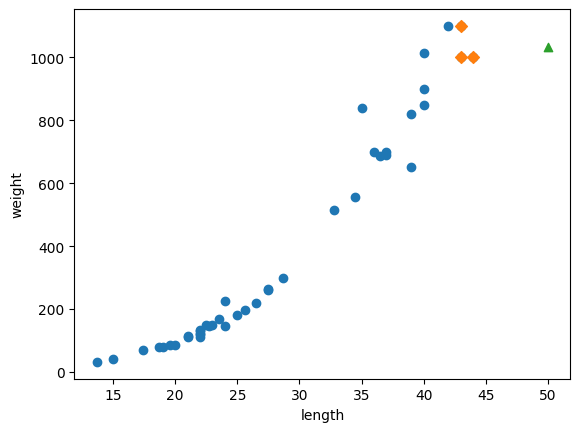

In [19]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구하기
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그리기
plt.scatter(train_input, train_target)

# 훈련 세트 중에서도 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#50cm 농어 데이터
plt.scatter(50,1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- kneighbors() 메서드를 사용하면 가장 가까운 이웃까지의 거리와 이웃 샘플의 인덱스를 얻을 수 있다.

## 모델이 맞지 않는 이유

- k-최근점 이웃 알고리즘은 가장  가까운 샘플들의 무게를 평균을 내기 때문이다.

In [20]:
# 이웃 샘플들의 타깃의 평균
print(np.mean(train_target[indexes]))

1033.3333333333333


모델의 예측값이랑 동일

In [21]:
# 길이가 아무리 커져도 예측값은 동일
print(knr.predict([[100]]))
print(knr.predict([[1000]]))

[1033.33333333]
[1033.33333333]


### 예측값이 일정해지는 길이 찾기

예측값이 변하지 않기 시작하는 작은 쪽 길이: 11 cm
예측값이 변하지 않기 시작하는 큰 쪽 길이: 43 cm


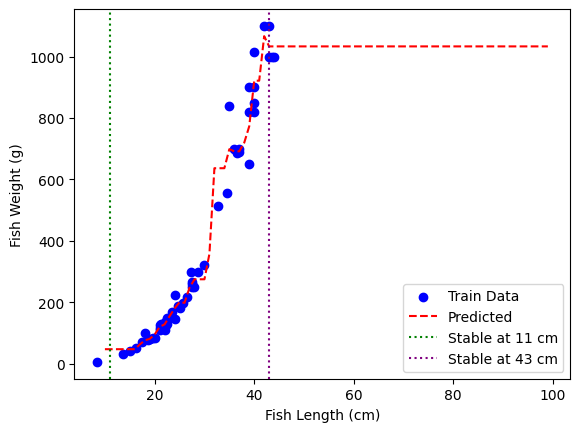

In [22]:
# 테스트할 길이 범위 (10cm ~ 100cm)
test_lengths = np.arange(10, 100, 1).reshape(-1, 1)
predicted_weights = knr.predict(test_lengths)

# 1️⃣ 작은 쪽: 처음으로 예측값이 변하지 않기 시작하는 길이 찾기
stable_length_small = None
for i in range(1, len(predicted_weights)):
    if np.isclose(predicted_weights[i], predicted_weights[i-1]):  # 연속된 값이 같아지는 순간
        stable_length_small = test_lengths[i][0]
        break

# 2️⃣ 큰 쪽: 마지막으로 예측값이 변한 후 고정되는 길이 찾기
stable_length_large = None
for i in range(len(predicted_weights) - 2, -1, -1):  # 뒤에서부터 탐색
    if not np.isclose(predicted_weights[i], predicted_weights[i+1]):  # 값이 변하는 순간 찾기
        stable_length_large = test_lengths[i+1][0]  # 변한 직후 길이가 고정되는 길이
        break

# 결과 출력
print(f"예측값이 변하지 않기 시작하는 작은 쪽 길이: {stable_length_small} cm")
print(f"예측값이 변하지 않기 시작하는 큰 쪽 길이: {stable_length_large} cm")

# 시각화
plt.scatter(perch_length, perch_weight, color='blue', label='Train Data')
plt.plot(test_lengths, predicted_weights, color='red', linestyle='dashed', label='Predicted')
if stable_length_small:
    plt.axvline(x=stable_length_small, color='green', linestyle='dotted', label=f'Stable at {stable_length_small} cm')
if stable_length_large:
    plt.axvline(x=stable_length_large, color='purple', linestyle='dotted', label=f'Stable at {stable_length_large} cm')
plt.xlabel('Fish Length (cm)')
plt.ylabel('Fish Weight (g)')
plt.legend()
plt.show()

## 선형 회귀

In [23]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

# 선형 회귀 모델을 훈련합니다.
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


In [24]:
# 기울기와 y절편
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


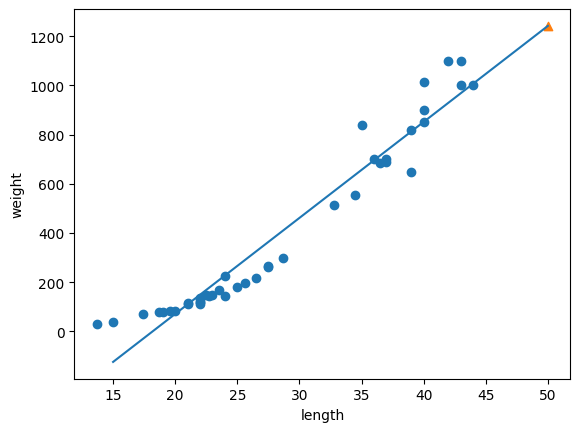

In [25]:
# 훈련 세트의 산점도와 회귀선 한 번에 그리기

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프 그리기
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
# 훈련 세트와 테스트 세트에 대한 R^2 점수 확인하기
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


- 훈련 세트의 점수가 너무 낮음 → 과소적합

## 다항 회귀

- 최적의 직선 대신 최적의 곡선 찾기

In [27]:
# 농어의 길이를 제곱하여 원래 데이터 앞에 붙여보기
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

In [28]:
# train_poly를 사용해 선형 회귀 모델을 다시 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


농어 길이의 제곱과 원래 농어 길이를 **함께** 넣어주기

In [29]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


이 모델은 다음과 같은 그래프를 학습
- **무게 = 1.01(길이)^2 - 21.6(길이) + 116.05**

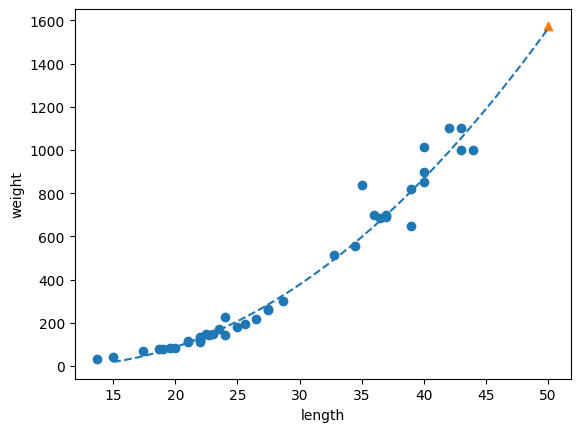

In [30]:
# 훈련 세트의 산점도와 회귀선 한 번에 그리기

# 구간별 직선을 기리기 위해 15에서 50까지 정수 배열을 만들기
point = np.arange(15, 51)

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 50까지 2차 방정식 그래프 그리기
plt.plot(point, 1.01 * point**2 - 21.6 * point + 116.05, linestyle='--')

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- numpy.arange() 함수 사용법
```
numpy.arange([start, ]stop, [step, ]dtype=None)
```
start: 생성할 배열의 시작 값 (기본값은 0)   
stop: 생성할 배열의 종료 값 (이 값은 포함되지 않음)   
step: 숫자 사이의 간격 (기본값은 1)   
dtype: 생성할 배열의 데이터 타입 (옵션)

In [31]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


- 테스트 세트의 점수가 약간 더 높음 → 약간의 과소적합

# 3-3. 특성 공학과 규제

## 농어 데이터 준비

In [32]:
import pandas as pd

In [33]:
# 길이, 높이, 두께 데이터
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [34]:
# 무게 데이터(타깃 데이터)
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0])

## 머신러닝 준비

### 훈련 세트와 테스트 세트로 분류

In [35]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

### 사이킷런의 변환

- 변환기: 특성을 만들거나 전처리하기 위한 클래스

In [36]:
# PolynomialFeatures 클래스 사용 예시
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


| 변환된 특성  | 값  | 설명  |
|------------|----|------|
| 1  | 1 | 상수항 (bias term) |
| x_1 | 2 | 원본 첫 번째 특성 (2) |
| x_2  | 3 | 원본 두 번째 특성 (3) |
| x_1^2  | 4 | 첫 번째 특성의 제곱 ( \(2^2\) ) |
| (x_1) x (x_2) | 6 | 두 특성의 곱 ( \(2 x 3\) ) |
| x_2^2  | 9 | 두 번째 특성의 제곱 ( \(3^2\) ) |


- 훈련(fit)을 통해 새롭게 만들 특성 조합을 찾고 변환(transform)을 통해 실제로 데이터를 변환

회귀 모델은 아래와 같다.
$$무게 = a×길이 ＋ b×높이＋ c×두께 ＋ d×1 $$

선형 방정식의 절편은 항상 값이 1인 특성과 곱해지는 계수 'd'   
따라서 특성은 (길이, 높이, 두께, 1)이 된다.

In [37]:
# 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 이렇게 특성을 만들 필요 X, include_bias=False로 설정
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


- 절편 항(1) 제거

In [38]:
# 이 방식을 train_input에 적용하고, 변환한 데이터를 train_poly에 저장
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [39]:
# 배열의 크기 확인
print(train_poly.shape)

(42, 9)


In [40]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

'x0'은 첫 번째 특성, 'x0^2'는 첫 번째 특성의 제곱, 'x0 x1'은 첫 번째 특성과 두 번쨰 특성의 곱

In [41]:
# 테스트 세트를 변환
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련하기

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [43]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594111


- train과 test 모두 점수가 높고, train 점수 > test 점수 → 과소적합 해결

### 특성을 더 추가하기

In [44]:
# 5제곱까지 특성을 만들어 출력
poly = PolynomialFeatures(include_bias=False, degree=5)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


- 55개의 특성 발현

In [45]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


- 점수가 음수 → 과대적합 발생(훈련 모델에는 완벽하지만, 테스트 모델에는 부적합)
- 모델이 실제 평균값보다 더 나쁜 예측을 하면 R²가 음수가 됨

## 규제, 릿지 회귀, 라쏘 회귀

### 규제

- 규제: 모델이 훈련 세트에 과대적합되지 않도록 만드는 것(선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 줄이는 것)
  - 규제를 적용하기 전에는 정규화가 필요

In [46]:
# StandardScaler 클래스 사용
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

- StandardScaler는 데이터를 표준화(standardization)하는 변환기

### 릿지 회귀

- 릿지: 계수를 **제곱**한 값을 기준으로 규제를 적용

In [47]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [48]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


- alpha 매개변수로 규제의 강도를 조절
  - alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 **과소적합되도록 유도**
  - alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형회귀 모델과 유사해지므로 **과대적합될 가능성이 커짐**

- 적절한 alpha 값을 찾는 방법은 alpha 값에 대한 $R^2$ 값의 그래프를 그리는 것. → 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha

In [50]:
# alpha 값을 바꿀 때마다 score() 메서드의 결과를 저장할 리스트 만들기
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [51]:
# alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련하고 점수를 저장

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 릿지 모델 만들기
  ridge = Ridge(alpha=alpha)
  # 릿지 모델 훈련
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

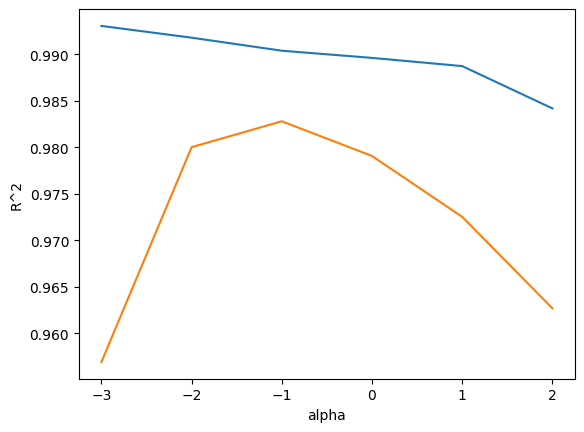

In [53]:
# 그래프 그리기, x축 로그화
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

파란색이 훈련 세트 그래프, 주황색이 테스트 세트 그래프

In [54]:
# alpha = 0.1로 하여 최종 모델 훈련
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


### 라쏘 회귀

- 라쏘: 계수의 **절댓값**을 기준으로 규제를 적용.(계수를 0으로 만들수도 있다.)

In [55]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [56]:
# alpha 값 찾기
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 라쏘 모델 만들기
  lasso = Lasso(alpha=alpha, max_iter=10000)
  # 라쏘 모델 훈련
  lasso.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


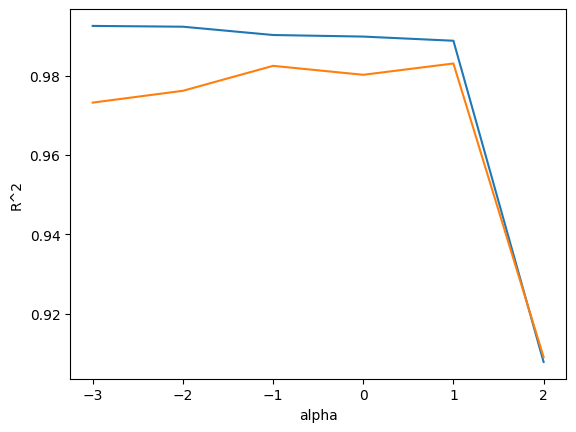

In [58]:
# 그래프 그리기, x축 로그화
plt.plot(np. log10(alpha_list), train_score)
plt.plot(np. log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [60]:
# alpha = 10로 하여 최종 모델 훈련
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [61]:
# 계수 값을 0으로 만들어보기
print(np.sum(lasso.coef_==0))

40
